# **Chapter 3: Classification**

## **1. Pendahuluan**

Di bab sebelumnya, kita telah mempelajari tugas *Regression* (memprediksi nilai, seperti harga rumah). Sekarang, kita akan beralih ke **Classification** (memprediksi kelas/kategori).

**Dataset: MNIST**
Dalam bab ini, kita akan menggunakan dataset **MNIST**, yang sering disebut sebagai *"Hello World"* dari Machine Learning. Dataset ini berisi 70.000 gambar kecil angka tulisan tangan (0-9) yang telah diberi label.
**Tujuan Pembelajaran:**
1.  Memahami **Binary Classification** vs **Multiclass Classification**.
2.  Mempelajari ukuran performa (*Performance Measures*) yang lebih canggih daripada sekadar akurasi, seperti **Precision, Recall, F1 Score,** dan **ROC Curve**.
3.  Melakukan **Error Analysis** untuk meningkatkan model.
4.  Memahami konsep **Multilabel Classification**.

Mari kita mulai dengan membedah dataset MNIST

## **2. Mengambil Data (MNIST)**

Langkah pertama adalah mengunduh dataset. Scikit-Learn menyediakan fungsi helper untuk mengunduh dataset populer seperti MNIST

In [8]:
# Mengimpor library yang dibutuhkan
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST (versi 1)
# as_frame=False agar formatnya array numpy, bukan pandas dataframe
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Melihat kunci dictionary dataset
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


Dataset yang dimuat oleh Scikit-Learn umumnya memiliki struktur dictionary:

**Struktur Dataset**

Dataset yang dimuat oleh Scikit-Learn umumnya memiliki struktur dictionary:
* DESCR: Menjelaskan dataset.
* data: Array dengan satu baru per instans dan satu kolom per fitur.
* target: array yang berisi label.

Setiap gambar berukuran $28 \times 28$ piksel, sehingga terdapat 784 fitur. Setiap fitur mewakili intensitas piksel dari 0 (putih) hingga 255 (hitam)

In [9]:
X, y = mnist["data"], mnist["target"]
print("Shape X:", X.shape) # (70000, 784)
print("Shape y:", y.shape) # (70000,)

Shape X: (70000, 784)
Shape y: (70000,)


**Visualisasi Digit**

Mari kita lihat salah satu digit dari dataset untuk mendapatkan intuisi. Kita perlu mengubah bentuk vektor fitur menjadi array 2D ($28 \times 28$)

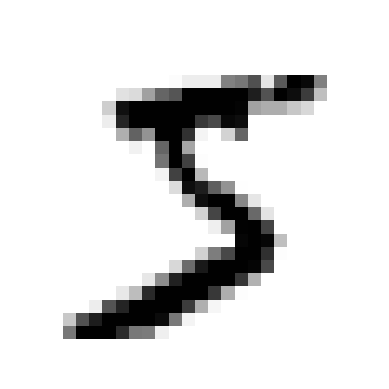

Label aktual: 5


In [ ]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

# Memeriksa label aktual
print("Label aktual:", y[0])

Label saat ini berupa string, jadi kita perlu mengubahnya menjadi integer agar dapat diproses oleh algoritma ML.

In [ ]:
# Mengubah tipe data label dari string ke integer
y = y.astype(np.uint8)

**Memisahkan *Training* dan *Test Set***

Dataset MNIST sudah dipisahkan menjadi *training set* (60.000 gambar pertama) dan *test set* (10.000 gambar terakhir). Data latih juga sudah diacak (*shuffled*), yang menjamin validasi silang (*cross-validation*) yang baik karena setiap fold akan memiliki distribusi yang seragam.

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## **3. Melatih Binary Classifier**

Untuk menyederhanakan masalah, kita akan mulai dengan Binary Classifier (pengklasifikasi biner) yang hanya mendeteksi satu digit: apakah gambar ini angka 5 atau bukan ("5-detector").

Kita perlu membuat vektor target baru untuk tugas ini:

In [17]:
y_train_5 = (y_train == 5) # True untuk semua 5, False untuk lainnya
y_test_5 = (y_test == 5)

**Stochastic Gradient Descent (SGD)**

Kita akan menggunakan SGDClassifier. Algoritma ini efisien untuk dataset besar karena memproses instans pelatihan secara independen satu per satu, yang juga membuatnya cocok untuk online learning . Karena sifatnya stokastik (acak), kita perlu mengatur random_state agar hasil dapat direproduksi.

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Mencoba memprediksi digit yang kita ambil sebelumnya
sgd_clf.predict([some_digit])

array([ True])